## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>
<p>Your two questions are as follow:

### 1. What percentage of all licensed sets ever released were Star Wars themed? 

Save your answer as a variable `the_force` in the form of an integer (e.g 25)

In [1]:
# Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Import the relevant csv files
lego_df = pd.read_csv('lego_sets.csv')
lego_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [3]:
# Import the relevant csv files
theme_df = pd.read_csv('parent_themes.csv')
theme_df.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [4]:
# Exploring more info on the type of data for lego dataframe
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [5]:
lego_df['parent_theme'].value_counts()

Town              1116
Seasonal           928
Star Wars          609
Technic            536
Service Packs      456
                  ... 
Avatar               2
Ghostbusters         1
Disney               1
LEGO Exclusive       1
Universe             1
Name: parent_theme, Length: 109, dtype: int64

In [6]:
# Exploring more info on the type and amount of data for theme dataframe
theme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


In [7]:
theme_df['is_licensed'].value_counts()

False    89
True     22
Name: is_licensed, dtype: int64

In [8]:
# Merging the two dataframe together on the key of parent_theme
lego = pd.merge(lego_df, theme_df[['name', 'is_licensed']], 
                how = 'inner', left_on = 'parent_theme', right_on = 'name') # Merge based on the parent_themes
lego

,set_num,name_x,year,num_parts,theme_name,parent_theme,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,Legoland,False
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,Ben 10,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,Ben 10,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,Ben 10,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,Ben 10,True


In [9]:
# Dropping the name_y column
lego = lego.drop(['name_y'], axis = 1)
lego.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,False


In [10]:
# Checking to see if is_licensed has any NaN values
lego['is_licensed'].value_counts()

False    10654
True      1332
Name: is_licensed, dtype: int64

In [11]:
# Getting licensed lego sets
lego_licensed = lego[lego['is_licensed'] == True]
lego_licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,True


In [12]:
# Getting overview of lego_licensed
lego_licensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 3493 to 11985
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       1179 non-null   object 
 1   name_x        1179 non-null   object 
 2   year          1332 non-null   int64  
 3   num_parts     755 non-null    float64
 4   theme_name    1179 non-null   object 
 5   parent_theme  1332 non-null   object 
 6   is_licensed   1332 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 74.1+ KB


<AxesSubplot:>

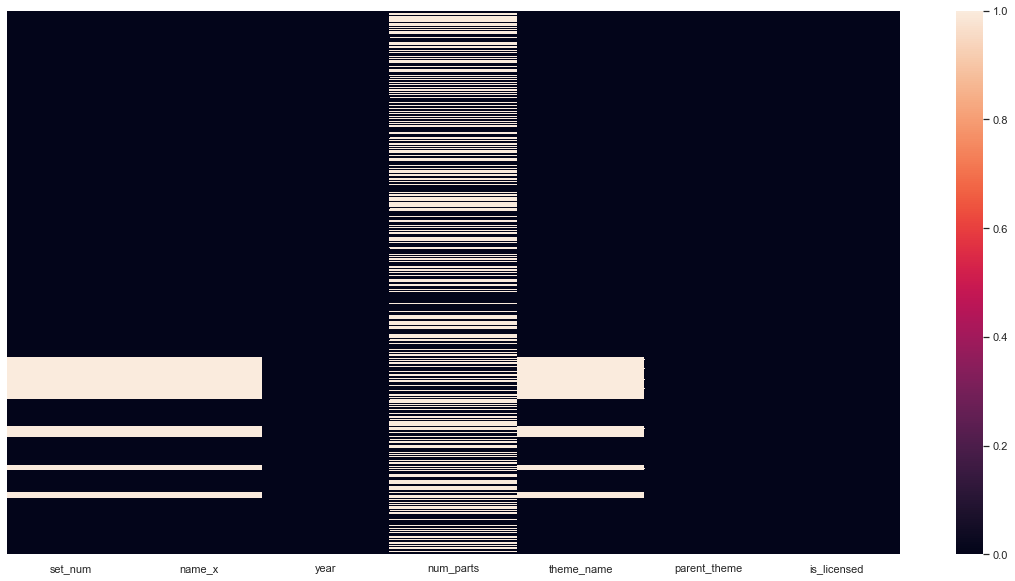

In [13]:
# Plotting out to see how many values are missing
plt.figure(figsize=(20,10))
sns.heatmap(lego_licensed.isna(), yticklabels=False)  # The peach color represents NaN

In [14]:
# Checking if star wars set is affected by sets that do not have a set_num
lego_licensed[(lego_licensed['set_num'].isna()) & lego_licensed['theme_name'] == 'Star Wars']
# Not affected

,set_num,name_x,year,num_parts,theme_name,parent_theme,is_licensed


In [15]:
# Droping sets with no set_num
lego_licensed = lego_licensed.dropna(subset = ['set_num']) # Only drop row if the set_num is NaN

In [16]:
lego_licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,True


In [17]:
# Getting total count of licensed sets
licensed_sets = lego_licensed['is_licensed'].count()
licensed_sets

1179

In [18]:
# Getting total count of licensed star wars set
licensed_star_wars = lego_licensed[lego_licensed['parent_theme'] == 'Star Wars']['is_licensed'].count()
licensed_star_wars

609

In [19]:
# Gettign percentage
the_force = (licensed_star_wars/licensed_sets)*100
print(f"The percentage of all licensed sets ever released were Star Wars themed is {the_force:.0f}%.")

The percentage of all licensed sets ever released were Star Wars themed is 52%.


### 2. In which year was Star Wars NOT the most popular licensed theme (in terms of sets released that year)?

Save your answer as a variable `new_era` in the form of an integer (e.g 2012)

In [20]:
# Grouping by year and parent theme
lego_groupby = lego_licensed.groupby(['year','parent_theme']).count()
lego_groupby.head(10)

set_num  name_x  num_parts  theme_name  \
year parent_theme                                                    
1999 Star Wars                   13      13          7          13   
2000 Disney's Mickey Mouse        5       5          4           5   
     Star Wars                   26      26         16          26   
2001 Harry Potter                11      11          6          11   
     Star Wars                   14      14          9          14   
2002 Harry Potter                19      19          9          19   
     Star Wars                   28      28         16          28   
     Super Heroes                 3       3          3           3   
2003 Harry Potter                 3       3          0           3   
     Star Wars                   32      32         16          32   

                            is_licensed  
year parent_theme                        
1999 Star Wars                       13  
2000 Disney's Mickey Mouse            5  
     Star Wars                       26  
2001 Harry Potter                    11  
     Star Wars                       14  
2002 Harry Potter                    19  
     Star Wars                       28  
     Super Heroes                     3  
2003 Harry Potter                     3  
     Star Wars                       32

In [21]:
# Sort the dataframe by is_licensed
lego_groupby.sort_values(['year','is_licensed'], ascending = [True, False], inplace = True)
lego_groupby.head(10)

set_num  name_x  num_parts  theme_name  \
year parent_theme                                                    
1999 Star Wars                   13      13          7          13   
2000 Star Wars                   26      26         16          26   
     Disney's Mickey Mouse        5       5          4           5   
2001 Star Wars                   14      14          9          14   
     Harry Potter                11      11          6          11   
2002 Star Wars                   28      28         16          28   
     Harry Potter                19      19          9          19   
     Super Heroes                 3       3          3           3   
2003 Star Wars                   32      32         16          32   
     Super Heroes                 5       5          2           5   

                            is_licensed  
year parent_theme                        
1999 Star Wars                       13  
2000 Star Wars                       26  
     Disney's Mickey Mouse            5  
2001 Star Wars                       14  
     Harry Potter                    11  
2002 Star Wars                       28  
     Harry Potter                    19  
     Super Heroes                     3  
2003 Star Wars                       32  
     Super Heroes                     5

In [22]:
# Getting all unique values in the year column
year_values = lego_groupby.index.get_level_values(0).unique()

In [23]:
# Using a for loop to check if star wars was the most popular licensed set that year
new_era = []

for year in year_values:
    if (lego_groupby.loc[year].head(1).index != 'Star Wars'):
        new_era.append(year)

print(new_era)

[2017]


In [24]:
# Print the result
print("Years that Star Wars was NOT the most popular licenesed themes:\n")
for i in range(len(new_era)):
    print(new_era[i])

Years that Star Wars was NOT the most popular licenesed themes:

2017


### BONUS: How many  sets did Lego produce each year?

Display the dataframe

In [25]:
# Creating a new column called 'count' to help with groupby later
lego['count'] = 1

<AxesSubplot:>

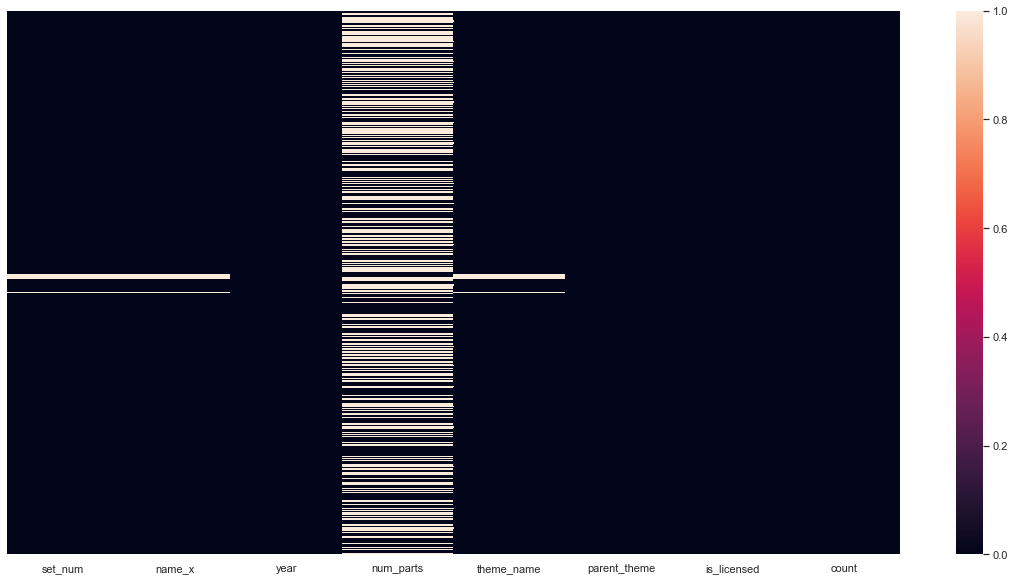

In [26]:
# Plotting out to see how many values are missing
plt.figure(figsize=(20,10))
sns.heatmap(lego.isna(), yticklabels=False)  # The peach color represents NULL

In [27]:
# Droping rows where set_num is NULL
lego = lego.dropna(subset = ['set_num'])

<AxesSubplot:>

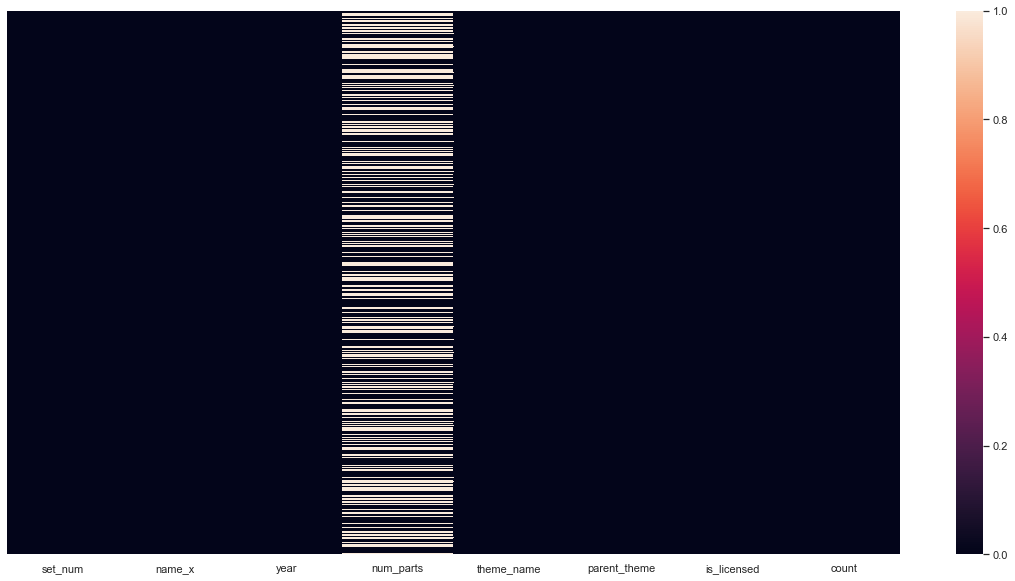

In [28]:
# Checking to see if the NULL values are removed
plt.figure(figsize=(20,10))
sns.heatmap(lego.isna(), yticklabels=False)  # The peach color represents NULL

In [46]:
# Getting the table format
pd.set_option('display.max_rows',100)
lego.groupby('year').sum()[['count']]

,count
year,
1950,7
1953,4
1954,14
1955,28
1956,12
1957,21
1958,42
1959,4
1960,3


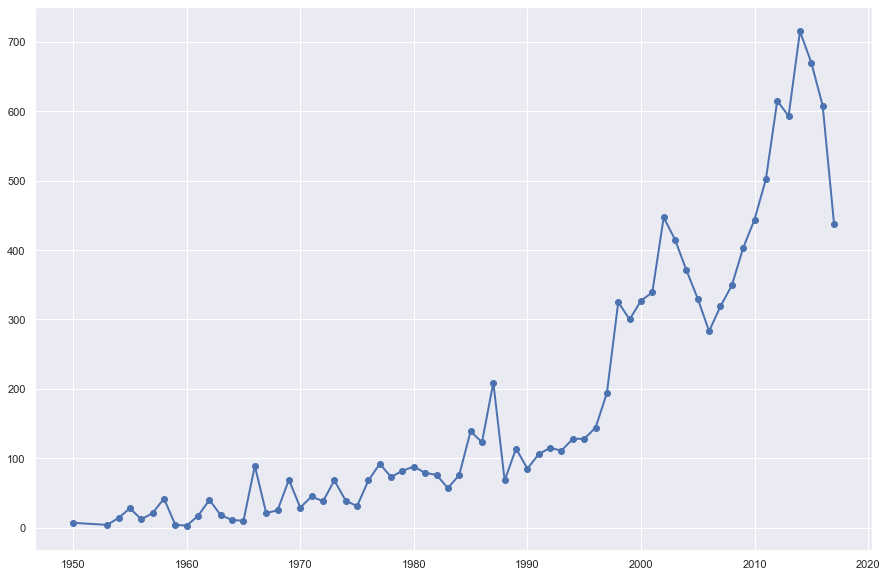

In [51]:
# Visual represntation of number of sets released
plt.figure(figsize = (15,10))
plt.plot(lego.groupby('year').sum().index, lego.groupby('year').sum()['count'],
        marker = 'o', linewidth = 2)